# Low b low l low velocity

In [18]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams.update({'font.size': 12})

In [2]:
data_file_path = '../../data_out/fourth_batch_all_prop.txt'

In [4]:
data = np.loadtxt(data_file_path, delimiter=',')

In [5]:
data.shape # 533 trees (excluding edge cases and ones that are too long in velocity), 22 fields outlined in keys

(1073, 33)

In [6]:
key_nums = data[:, 0]
ras = data[:, 1]
decs = data[:, 2]
ls = data[:, 3]
bs = data[:, 4]
sizes = data[:, 5]
roundnesses = data[:, 6]
starting_velocities = data[:, 7]
velocity_spans = data[:, 8]
average_velocities = data[:, 9]
moment_0_means = data[:, 10]
moment_0_medians = data[:, 11]
moment_0_peaks = data[:, 12]
moment_0_means_raw = data[:, 13]
moment_0_medians_raw = data[:, 14]
moment_0_peaks_raw = data[:, 15]
moment_1_means = data[:, 16]
moment_1_medians = data[:, 17]
moment_2_means = data[:, 18]
moment_2_medians = data[:, 19]
moment_2_peaks = data[:, 20]
column_density_means = data[:, 21]
column_density_medians = data[:, 22]
column_density_peaks = data[:, 23]
column_density_means_raw = data[:, 24]
column_density_medians_raw = data[:, 25]
column_density_peaks_raw = data[:, 26]
width_fits = data[:, 27]
width_errs = data[:, 28]
width_chisq = data[:, 29]
width_fits_raw = data[:, 30]
width_errs_raw = data[:, 31]
width_chisq_raw = data[:, 32]

In [46]:
v_cut = 10
b_cut = 30

In [47]:
idx = (np.abs(moment_1_means) < v_cut) & ((np.abs(bs) > b_cut) | (np.abs(bs) < b_cut) & ((ls < 90) | (ls > 270)))
# (v < 10) AND (b > 30 OR (b < 30 AND not galactic 180))

In [48]:
idx_n = -1 * idx

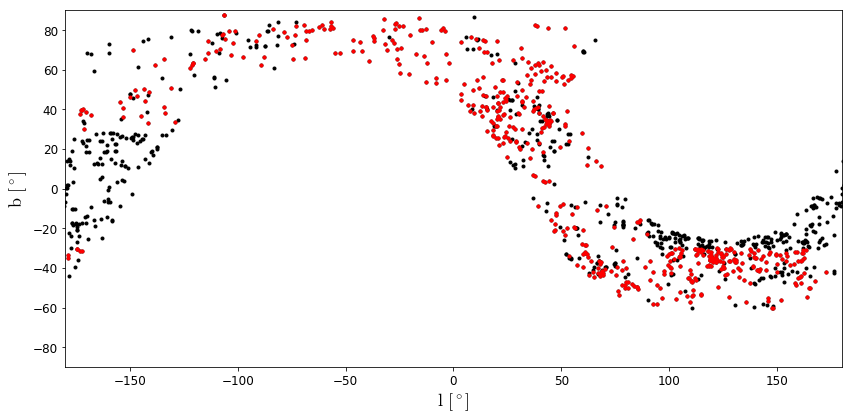

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(ls, bs, marker='.', color='black')
ax.scatter(ls-360, bs, marker='.', color='black')

ax.scatter(ls[idx], bs[idx], marker='.', color='red')
ax.scatter(ls[idx]-360, bs[idx], marker='.', color='red')

ax.set_ylim(-90, 90)
ax.set_xlim(-180, 180)
ax.set_xlabel(r'$\mathrm{l}\ [^\circ]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)
fig.tight_layout()
fig.show()

In [50]:
print(np.nanmean(width_fits_raw), np.nanmedian(width_fits_raw), np.nanstd(width_fits_raw))

(0.19579672005006082, 0.19226457765215477, 0.040106175819635492)


In [51]:
print(np.nanmean(width_fits_raw[idx]), np.nanmedian(width_fits_raw[idx]), np.nanstd(width_fits_raw[idx]))

(0.19720879278243317, 0.19448312691188871, 0.040774529737858965)


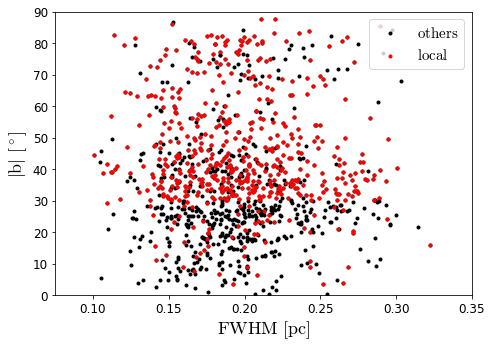

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax.scatter(width_fits_raw, np.abs(bs), marker='.', color='black', label=r'$\mathrm{others}$')
ax.scatter(width_fits_raw[idx], np.abs(bs[idx]), marker='.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{FWHM}\ [\mathrm{pc}]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)
ax.set_xlim(.075, .35)
ax.set_ylim(0, 90)
fig.tight_layout()
fig.show()

In [53]:
fig.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_abs_b_color_by_local.pdf')

In [45]:
dist_data = np.loadtxt('../../dist_data/lbdistances_txt_all_prop.txt', delimiter=' ')
dist = dist_data[:,2]
lower_lim_flag = dist_data[:,6]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 533 but corresponding boolean dimension is 1073

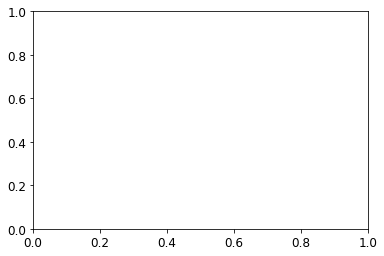

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(dist[~idx], np.abs(bs[~idx]), '.', color='black', label=r'$\mathrm{others}$')
ax.plot(dist[idx], np.abs(bs[idx]), '.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_ylabel(r'$|b|\ [^\circ]$', fontsize=18)
fig.tight_layout()
fig.show()

/Users/larryli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  from ipykernel import kernelapp as app


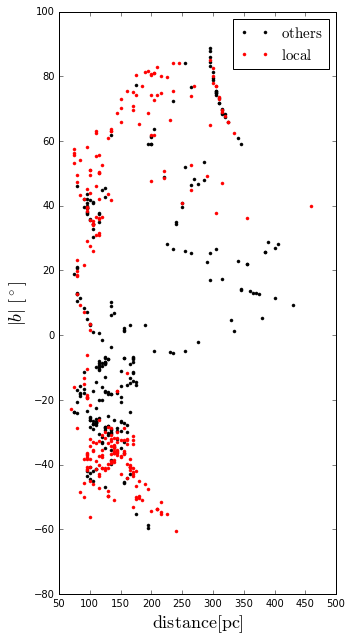

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,9))
ax.plot(dist[-idx], bs[-idx], '.', color='black', label=r'$\mathrm{others}$')
ax.plot(dist[idx], bs[idx], '.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_ylabel(r'$b\ [^\circ]$', fontsize=18)
fig.tight_layout()
fig.show()

/Users/larryli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  from ipykernel import kernelapp as app


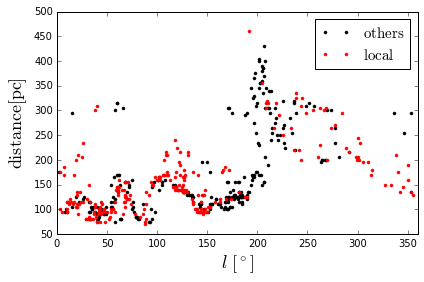

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(ls[-idx], dist[-idx], '.', color='black', label=r'$\mathrm{others}$')
ax.plot(ls[idx], dist[idx], '.', color='red', label=r'$\mathrm{local}$')
ax.set_xlim(0, 360)
ax.legend(fontsize=15)
ax.set_ylabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_xlabel(r'$l\ [^\circ]$', fontsize=18)
fig.tight_layout()
fig.show()